# Neural Arithmetic Logic Unit

This notebook contains basic experiments with the NAC and NALU activation units. We attempt to reproduce results relating to basic arithmetic functions found in [arXiv:1808.00508](https://arxiv.org/abs/1808.00508).

In [2]:
import keras as k
from keras.models import *
import keras.backend as K

C:\Users\acyrl\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
import nalu.GenData as gd

In [4]:
from nalu.NALU import NALU
from nalu.NAC import NAC

In [5]:
def pred_close(y_true, y_pred):
    return K.abs(y_true - y_pred) < 1e-4

## Identity

### NAC


We generate data in the way described in the paper. See gd.gd_paper for more details

In [6]:
_, Y = gd.gd_paper(size=100000)

In [12]:
x = Input((1,)) 
y = NAC(1)(x)
nac_identity_model = Model(x, y)
nac_identity_model.compile(k.optimizers.RMSprop(lr=0.01), "mse", metrics=[pred_close])
nac_identity_model.fit(Y, Y, batch_size=20, epochs=10, verbose=1)

Epoch 1/10
100000/100000 [==============================] - 7s 67us/step - loss: 1529.0961 - pred_close: 0.5688
Epoch 2/10
100000/100000 [==============================] - 6s 63us/step - loss: 5.1226e-10 - pred_close: 1.0000
Epoch 3/10
100000/100000 [==============================] - 7s 65us/step - loss: 4.8631e-10 - pred_close: 1.0000
Epoch 4/10
100000/100000 [==============================] - 7s 67us/step - loss: 0.0000e+00 - pred_close: 1.0000
Epoch 5/10
100000/100000 [==============================] - 7s 67us/step - loss: 0.0000e+00 - pred_close: 1.0000
Epoch 6/10
100000/100000 [==============================] - 7s 68us/step - loss: 0.0000e+00 - pred_close: 1.0000
Epoch 7/10
100000/100000 [==============================] - 7s 70us/step - loss: 0.0000e+00 - pred_close: 1.0000
Epoch 8/10
100000/100000 [==============================] - 7s 66us/step - loss: 0.0000e+00 - pred_close: 1.0000
Epoch 9/10
100000/100000 [==============================] - 7s 68us/step - loss: 0.0000e+00 - pre

In [13]:
# Saving the models 
nac_identity_model.save("saved_models/nac_id.h5")

In [16]:
nac_identity_model = load_model("saved_models/nac_id.h5", custom_objects={'NAC': NAC, 'pred_close': pred_close})

In [17]:
_, Yext = gd.gd_uniform(20,25, size=50000)
nac_identity_model.evaluate(Yext, Yext)

50000/50000 [==============================] - 1s 17us/step


[0.0, 1.0]

In [18]:
nac_identity_model.get_weights()

[array([[9.012988]], dtype=float32), array([[16.635536]], dtype=float32)]

### NALU

In [21]:
x = Input((1,)) # n is the dimension of the data, (n, N)
y = NALU(1)(x) # number of units, but let's test
nalu_identity_model = Model(x, y)
nalu_identity_model.compile(k.optimizers.RMSprop(lr=0.01), "mse", metrics=[pred_close])
nalu_identity_model.fit(Y, Y, batch_size=20, epochs=10)

Epoch 1/10
100000/100000 [==============================] - 8s 78us/step - loss: 95.6523 - pred_close: 0.6285
Epoch 2/10
100000/100000 [==============================] - 9s 87us/step - loss: 5.1226e-10 - pred_close: 1.0000
Epoch 3/10
100000/100000 [==============================] - 10s 102us/step - loss: 4.5456e-10 - pred_close: 1.0000
Epoch 4/10
100000/100000 [==============================] - 9s 93us/step - loss: 6.6350e-19 - pred_close: 1.0000
Epoch 5/10
100000/100000 [==============================] - 8s 85us/step - loss: 6.6350e-19 - pred_close: 1.0000
Epoch 6/10
100000/100000 [==============================] - 8s 84us/step - loss: 6.6350e-19 - pred_close: 1.0000
Epoch 7/10
100000/100000 [==============================] - 8s 78us/step - loss: 6.6350e-19 - pred_close: 1.0000
Epoch 8/10
100000/100000 [==============================] - 8s 79us/step - loss: 6.6350e-19 - pred_close: 1.0000
Epoch 9/10
100000/100000 [==============================] - 8s 77us/step - loss: 6.6350e-19 - pre

In [22]:
# Saving the models 
nalu_identity_model.save("saved_models/nalu_id.h5")

In [23]:
nalu_identity_model = load_model("saved_models/nalu_id.h5", custom_objects={'NALU': NALU, 'pred_close': pred_close})

In [24]:
_, Yext = gd.gd_uniform(20000,20010, size=50000)
nalu_identity_model.evaluate(Yext, Yext)


50000/50000 [==============================] - 1s 22us/step


[0.0, 1.0]

In [25]:
nalu_identity_model.get_weights()

[array([[9.010931]], dtype=float32),
 array([[16.635546]], dtype=float32),
 array([[1.6428401]], dtype=float32)]



No surprise that both of these units can learn the identity function.

## Addition

We now turn our attention to additive operation. 

We will study its error as 
### NAC

In [26]:
X, Y = gd.gd_paper(size=100000)

In [27]:
x = Input((2,)) # n is the dimension of the data, (n, N)
y = NALU(1)(x) # number of units, but let's test

nac_add_model = Model(x, y)
nac_add_model.compile(k.optimizers.RMSprop(lr=0.01), "mse", metrics=[pred_close])
nac_add_model.fit(X, Y, batch_size=20, epochs=50)

Epoch 1/50
100000/100000 [==============================] - 8s 80us/step - loss: 763.3561 - pred_close: 0.5503
Epoch 2/50
100000/100000 [==============================] - 8s 79us/step - loss: 9.4764e-07 - pred_close: 0.9992
Epoch 3/50
100000/100000 [==============================] - 8s 78us/step - loss: 4.3202e-07 - pred_close: 0.9995
Epoch 4/50
100000/100000 [==============================] - 9s 87us/step - loss: 2.8388e-07 - pred_close: 0.9996
Epoch 5/50
100000/100000 [==============================] - 9s 88us/step - loss: 2.0580e-07 - pred_close: 0.9997
Epoch 6/50
100000/100000 [==============================] - 8s 79us/step - loss: 1.5773e-07 - pred_close: 0.9997
Epoch 7/50
100000/100000 [==============================] - 8s 79us/step - loss: 1.3001e-07 - pred_close: 0.9997
Epoch 8/50
100000/100000 [==============================] - 8s 78us/step - loss: 1.1126e-07 - pred_close: 0.9998
Epoch 9/50
100000/100000 [==============================] - 8s 79us/step - loss: 9.8315e-08 - pred

#### Interpolation:


In [28]:
nac_add_model.save("saved_models/nac_add.h5")

In [29]:
nac_add_model = load_model("saved_models/nac_add.h5", custom_objects={'NALU': NALU, 'pred_close': pred_close})

In [35]:
nac_add_Xint, nac_add_Yint = gd.gd_paper(size=50000)
nac_add_model.evaluate(nac_add_Xint, nac_add_Yint)

50000/50000 [==============================] - 1s 22us/step


[4.357155878210506e-08, 0.99992]

In [43]:
nac_add_Xint_unif, nac_add_Yint_unif = gd.gd_uniform(size=50000)
nac_add_model.evaluate(nac_add_Xint_unif, nac_add_Yint_unif)

50000/50000 [==============================] - 1s 21us/step


[1.9352313728192172e-06, 0.9777]

There seems to be some overfitting to the way the data is generated. We should investigate its distribution.

#### Extrapolation

Here we will looks at outside the range of where the model was trained. Moreover, we will look at the behaviour of the error as we extrapolate further from the training range.

In [44]:
nac_add_Xext, nac_add_Yext = gd.gd_paper(10, 20, size=50000)
nac_add_model.evaluate(nac_add_Xext, nac_add_Yext)

50000/50000 [==============================] - 1s 21us/step


[1.962004098459147e-09, 0.90506]

In [45]:
nac_add_Xext_unif, nac_add_Yext_unif = gd.gd_uniform(100, 101, size=50000)
nac_add_model.evaluate(nac_add_Xext_unif, nac_add_Yext_unif)

50000/50000 [==============================] - 1s 22us/step


[5.7732686400413516e-11, 1.0]

We can investigate what happens we extrapolate. We will look at ever increasing of intervals of size.

In [48]:
nac_add_Xext_unif, nac_add_Yext_unif = gd.gd_uniform(10000, 10005, size=50000)
nac_add_model.evaluate(nac_add_Xext_unif, nac_add_Yext_unif)

50000/50000 [==============================] - 1s 21us/step


[9.352874755859375e-07, 0.75482]

In [49]:
import pandas as pd
plot_data = pd.DataFrame(data={'index': [], 'loss':[], 'pred_close':[]})

In [50]:
N = 500
for i in range(1, N):
    if not i % 20:
        print("iteration {0}/{1}".format(i, N))
    Xtest, Ytest = gd.gd_uniform(i*10, (i+1)*10-1, size=5000)
    nac_loss, nac_pred_close = nac_add_model.evaluate(Xtest, Ytest, verbose=0)
    plot_data = pd.concat([plot_data, pd.DataFrame({'index':[i*10], 'loss':[nac_loss], 'pred_close':[nac_pred_close]})])

iteration 20/500
iteration 40/500
iteration 60/500
iteration 80/500
iteration 100/500
iteration 120/500
iteration 140/500
iteration 160/500
iteration 180/500
iteration 200/500
iteration 220/500
iteration 240/500
iteration 260/500
iteration 280/500
iteration 300/500
iteration 320/500
iteration 340/500
iteration 360/500
iteration 380/500
iteration 400/500
iteration 420/500
iteration 440/500
iteration 460/500
iteration 480/500


In [52]:
%matplotlib inline

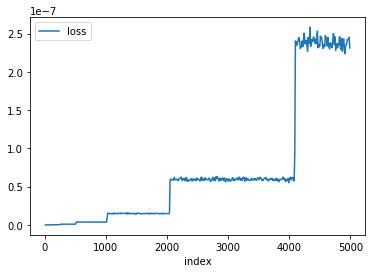

In [54]:
plot_data.plot(x='index', y='loss')

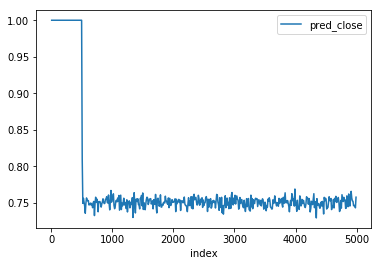

In [55]:
plot_data.plot(x='index', y='pred_close')

## All other operations